In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
#sns.set() Dado que vamos a hacer una infografia, necesitamos un control total del estilo del gráfico. Por lo mismo, no utilizaremos el método sns.set()

Vamos a generar una infografía del set de datos de la temperatura:

In [3]:
path = "http://srodriguez.me/Datasets/daily_temps.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
0,0,IDCJAC0010,23000,2019,1,1,32.4,1.0,N,adelaide,2019-01-01
1,1,IDCJAC0010,23000,2019,1,2,33.6,1.0,N,adelaide,2019-01-02
2,2,IDCJAC0010,23000,2019,1,3,41.5,1.0,N,adelaide,2019-01-03
3,3,IDCJAC0010,23000,2019,1,4,26.8,1.0,N,adelaide,2019-01-04
4,4,IDCJAC0010,23000,2019,1,5,23.1,1.0,N,adelaide,2019-01-05


En este caso, vamos a revisitar las Gridspec, con esto podremos seccionar nuestro gráfico para las distintas partes necesarias para generar nuestra infografía. Solo para recordar, vamos a generar 3 gráficos utilizando una grilla de $2\times2$

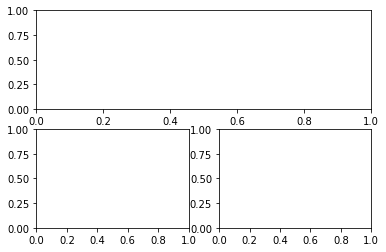

In [4]:
fig = plt.figure() # Generamos una figura
gs = fig.add_gridspec(nrows=2, ncols=2) #Añadimos 2 filas y 2 columnas
ax1 = fig.add_subplot(gs[0, 0:2]) # Ocupamos 1 fila y 2 columnas para el primer subplot
ax2 = fig.add_subplot(gs[1, 0]) # Instanciamos el subplot inferior izquierdo
ax3 = fig.add_subplot(gs[1, 1]) # Instanciamos el subplot inferior derecho

Como base, vamos a generar una grilla bastante grande $(10\times10)$ en la cual podremos seccionar los gráficos para distintas temperaturas en las ciudades. Iremos comentado cada pieza de código, y de aquí en adelante, cualquier adición al código, se va a marcar con un comentario. Esto se realizará para ver la evolución del proceso creativo y ver cómo evoluciona nuestra infografía.

/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


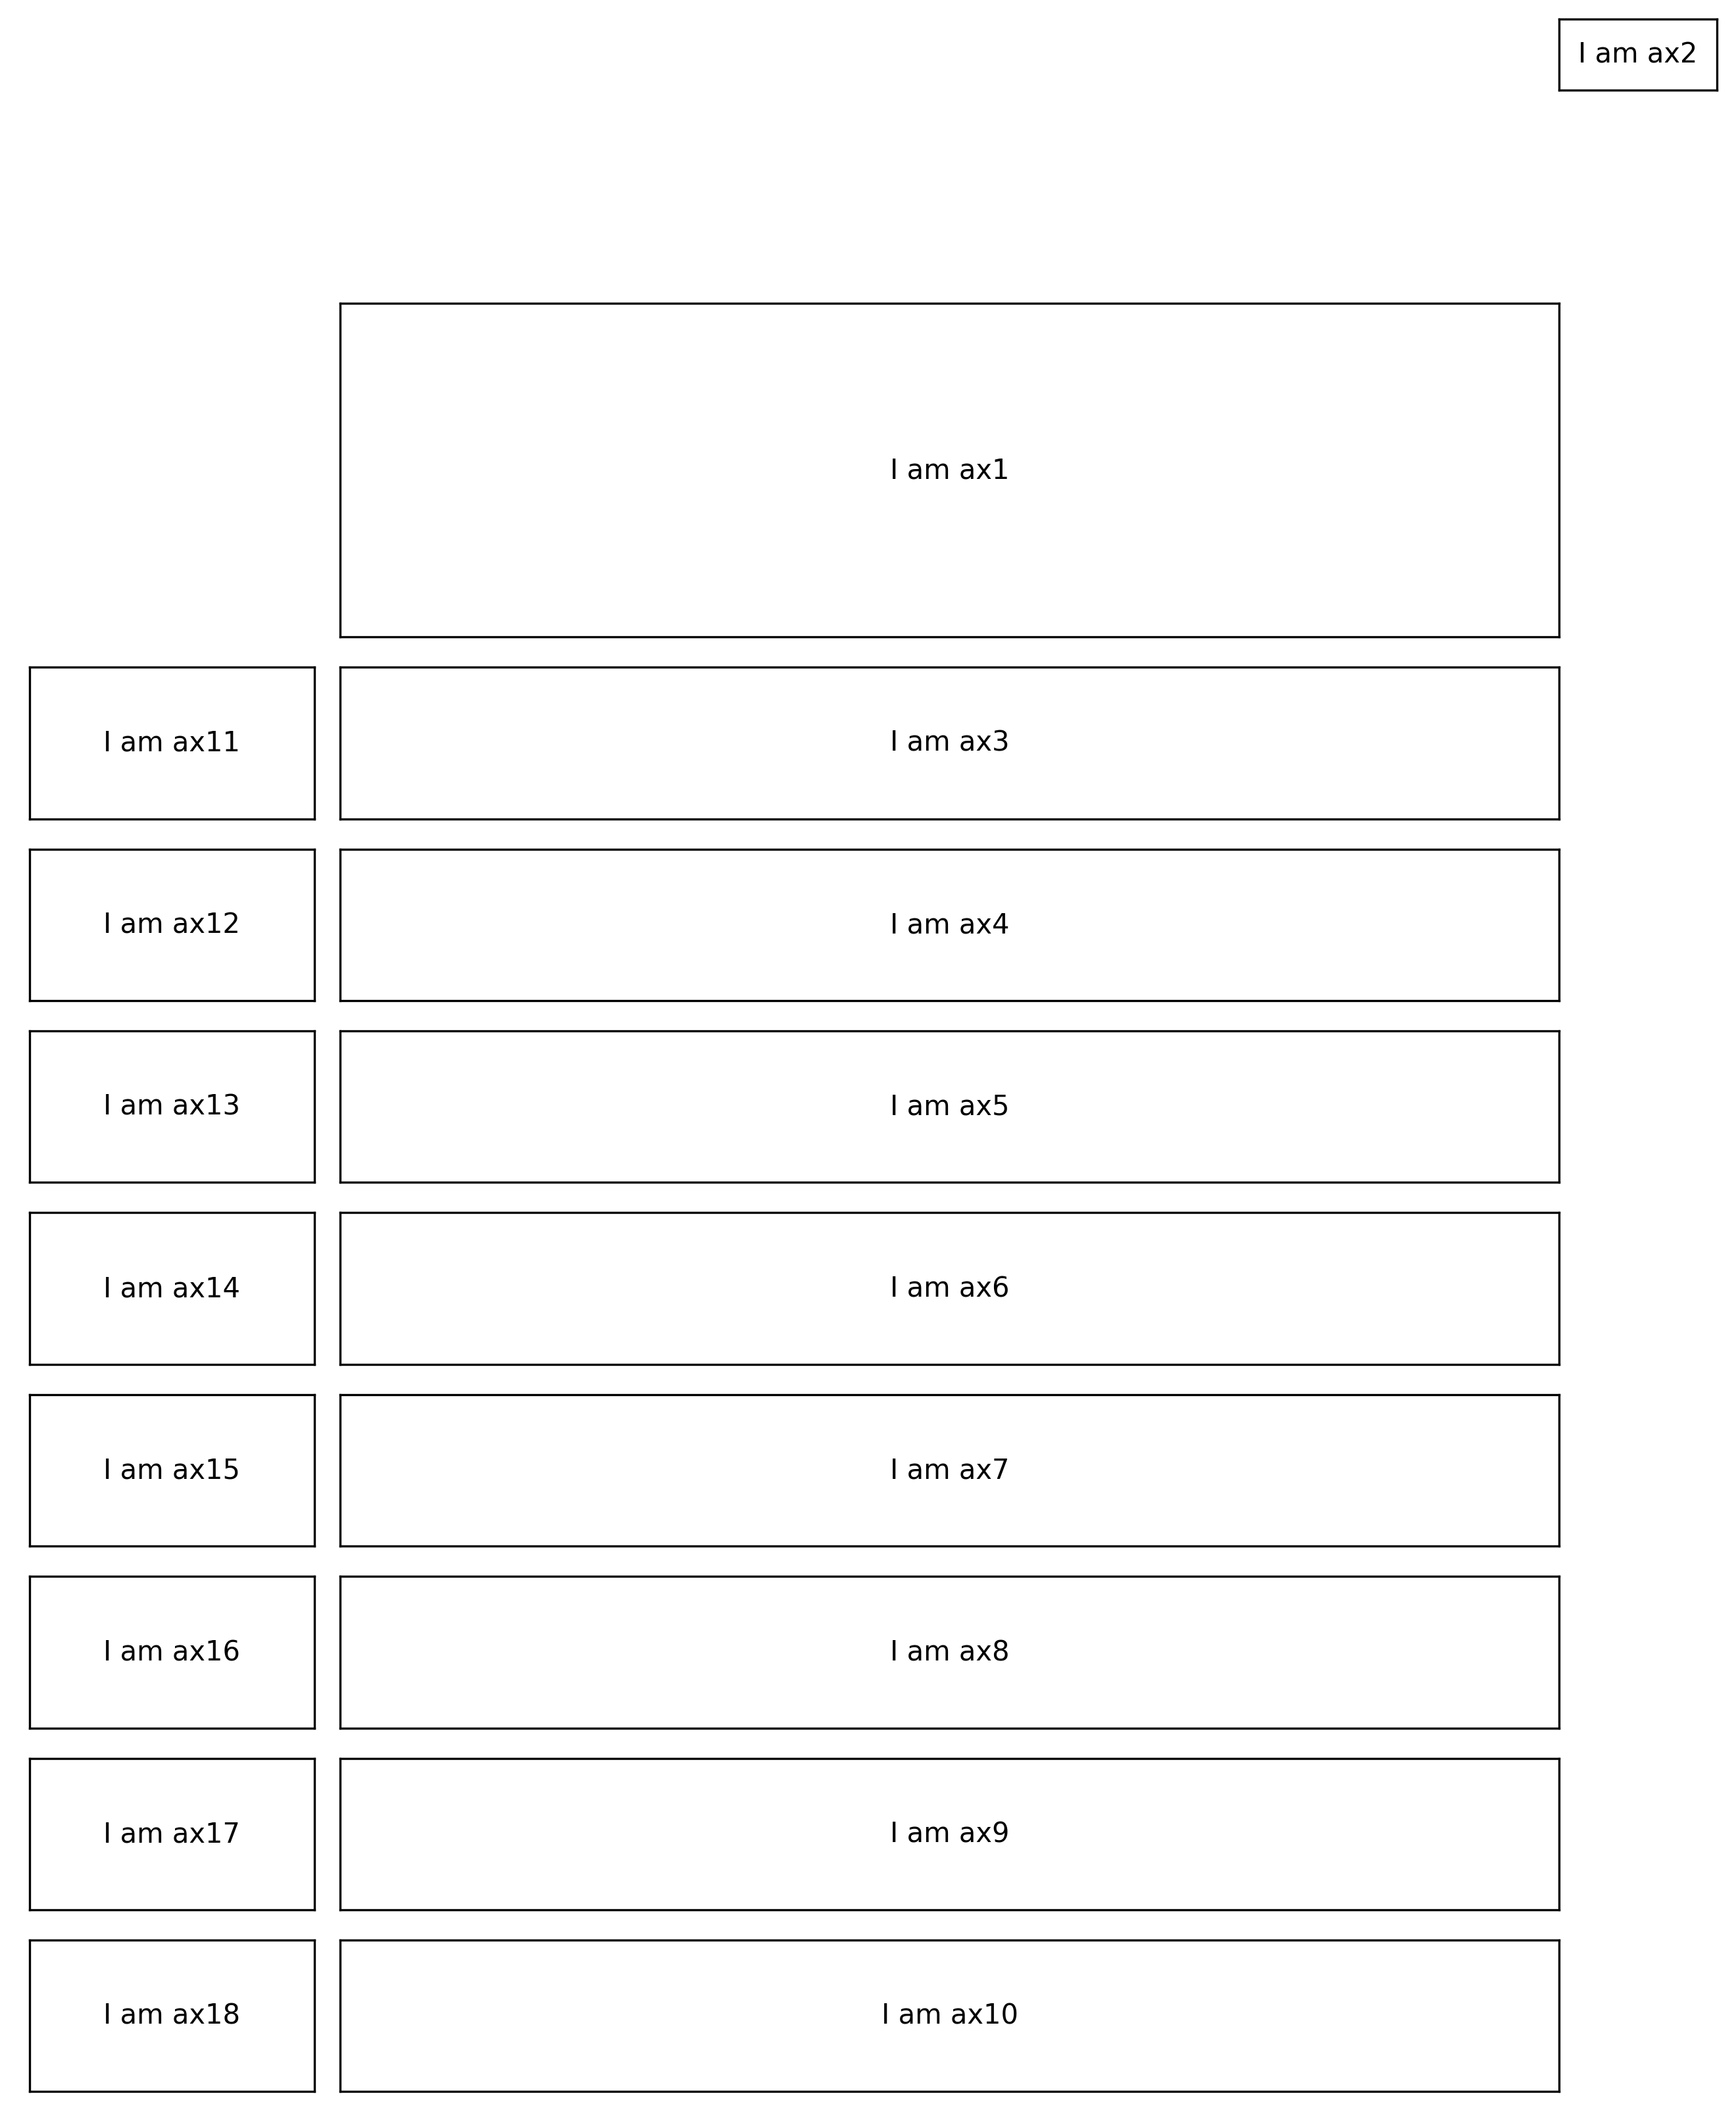

In [5]:

# Lista de ciudades que existen en nuestro set de datos
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

# Vamos a generar nuestro objeto figura, al cual le añadiremos la grilla, cabe destacar que 
# utilizamos el parametro constrained_layout=True para evitar que los ejes entre subgraficos
# se intersecten y generen problemas de legibilidad.
fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

# Generamos nuestra grilla de 10x10
gs = fig.add_gridspec(nrows=10, ncols=10)

# Vamos a generar un subgrafico que utilice las primeras 2 filas, y 8 columnas (a partir desde la columna 3 hasta la 10)
axText = fig.add_subplot(gs[0:2, 2:10])
axText.annotate('I am ax1', (0.5, 0.5), # Vamos a generar un texto indicando el ax1
                xycoords='axes fraction', va='center', ha='center')
axText.get_xaxis().set_visible(False) # vamos a borrar temporalmente las etiquetas de los ejes X e Y
axText.get_yaxis().set_visible(False)

# Vamos a generar el "placeholder" para la barra de color asociado a las temperaturas presentes en el set de datos
# Ojo que vamos a generar un subgrafico "flotante" sobre ax1. En este caso, el arreglo contiene 
# [borde_izquierdo, borde_inferior, ancho, alto] y todas estas dimensiones son en relación porcentuales de la figura
axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)
axInlet.annotate('I am ax2', (0.5, 0.5),
                 xycoords='axes fraction', va='center', ha='center')
axInlet.get_xaxis().set_visible(False)
axInlet.get_yaxis().set_visible(False)

# vamos a generar varios subgraficos, uno por cada ciudad, ocupando 1 fila y 8 columnas
for i, city in enumerate(cityList):
    ax = fig.add_subplot(gs[i+2, 2:10])
    ax.annotate('I am ax{}'.format(i+3), (0.5, 0.5),
                xycoords='axes fraction', va='center', ha='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# vamos a generar varios subgraficos, uno por cada ciudad para añadir el texto de que ciudad corresponde, ocupando 1 fila y las 2 primeras columnas
for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2])
    axRain.annotate('I am ax{}'.format(i+11), (0.5, 0.5),
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.show()

Dado que vamos a hacer un gráfico por cada una de las ciudades presentes en el set de datos, vamos a hacer pequeños prototipos previos a la inserción en nuestra infografía. Vamos a partir arbitrariamente con la ciudad de hobart:

In [6]:
#Filtramos el dataframe para obtener todos los registros que pertenescan a la ciudad de hobart
sub_df = df[df['City'] == 'hobart']

<AxesSubplot:xlabel='Date', ylabel='max_tmp_day'>

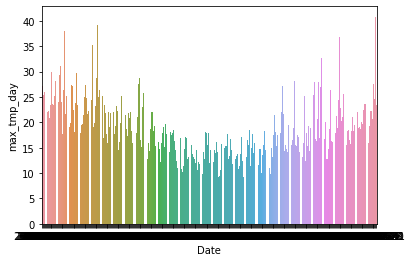

In [7]:
#Luego, de este dataset filtrado, vamos a graficar utilizando un barplot, las distintas temperaturas maximas diarias:
sns.barplot(x='Date',y="max_tmp_day",data=sub_df)

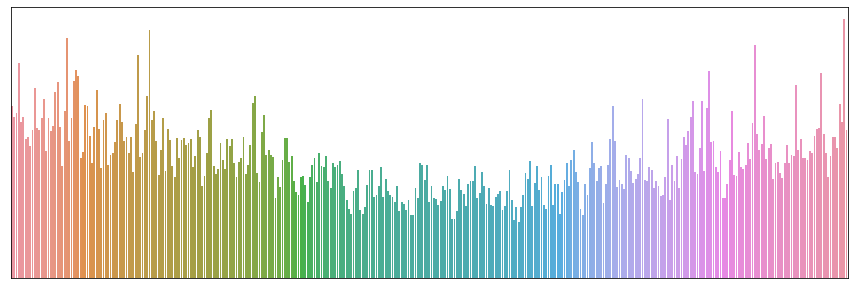

In [8]:
#Incrementemos el tamaño, y eliminemos los ejes X e Y debido a que no hicimos procesamiento previo a la columna de fechas
#Las etiquetas diaras generan problemas de lecturabilidad del eje X
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Date',y="max_tmp_day",data=sub_df)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Lo que vamos a hacer ahora, es definir una paleta de colores divergente, codificando los siguientes colores: Azul para temperaturas frías, Amarillo para temperaturas intermedias, Rojo para temperaturas calientes. Para esto vamos a utilizar el método `sns.color_palette()`, con dos parámetros:

- "RdYlBu_r": string indicando que queremos una paleta de colores RedYellowBlue_reverse (o sea, que parta desde Azul, vaya hacia amarillo y finalice en rojo)
- as_cmap=True: para que nos devuelva un objeto `map_color` de matplotlib.


In [9]:
color_p = sns.color_palette("RdYlBu_r",as_cmap=True)

con la paleta de colores, ahora necesitamos calcular el color para cada una de las barras (temperaturas frías, cercanas al azul y temperaturas calientes, cercanas al rojo). Para esto, el primer paso consiste en dejar las temperaturas en un rango de 0 a 1. Para esto mismo vamos dividir las temperaturas presentes en nuestro subconjunto (`sub_df`) por el valor máximo de las temperaturas para todas las ciudades (`max(df['max_tmp_day'].astype(int)`):

In [10]:
sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int))

1460    0.586957
1461    0.543478
1462    0.565217
1463    0.739130
1464    0.521739
          ...   
1820    0.434783
1821    0.586957
1822    0.521739
1823    0.869565
1824    0.500000
Name: max_tmp_day, Length: 365, dtype: float64

Con estos nuevos valores, podemos calcular los colores para cada una de las barras utilizando el colormap de la siguiente manera:

In [11]:
#Al colormap color_p, lo llamamos como una función y de parametro le damos el arreglo/serie de valores entre 0 y 1.

colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))
colors #imprimimos nuestra matriz de colores (con 4 columnas, RGBA) asociada para cada una de las barras presentes.

array([[0.99653979, 0.89273356, 0.58638985, 1.        ],
       [0.99823145, 0.94517493, 0.66589773, 1.        ],
       [0.99746251, 0.92133795, 0.62975779, 1.        ],
       ...,
       [0.99915417, 0.97377932, 0.70926567, 1.        ],
       [0.87658593, 0.25859285, 0.18523645, 1.        ],
       [0.99992311, 0.9976163 , 0.74540561, 1.        ]])

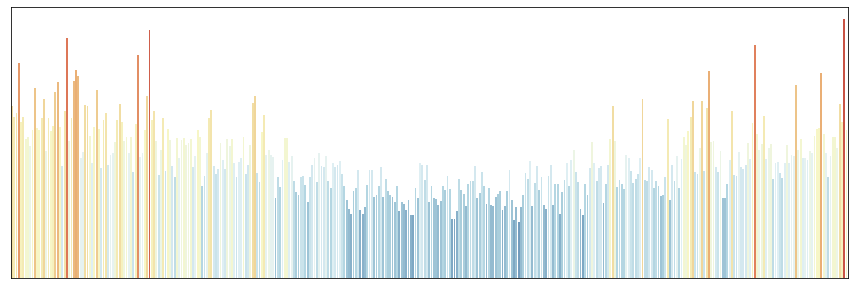

In [12]:

plt.figure(figsize=(15,5))
#Generamos nuestro nuevo gráfico utilizando los colores obtenidos al parametro palette
ax = sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Dado que ya estamos pintando aceptablemente el grafico de temperaturas para una ciudad, vamos a modificar los ciclos for, para que realice esto mismo para cada una de las ciudades en el espacio designado de nuestra infografía

/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


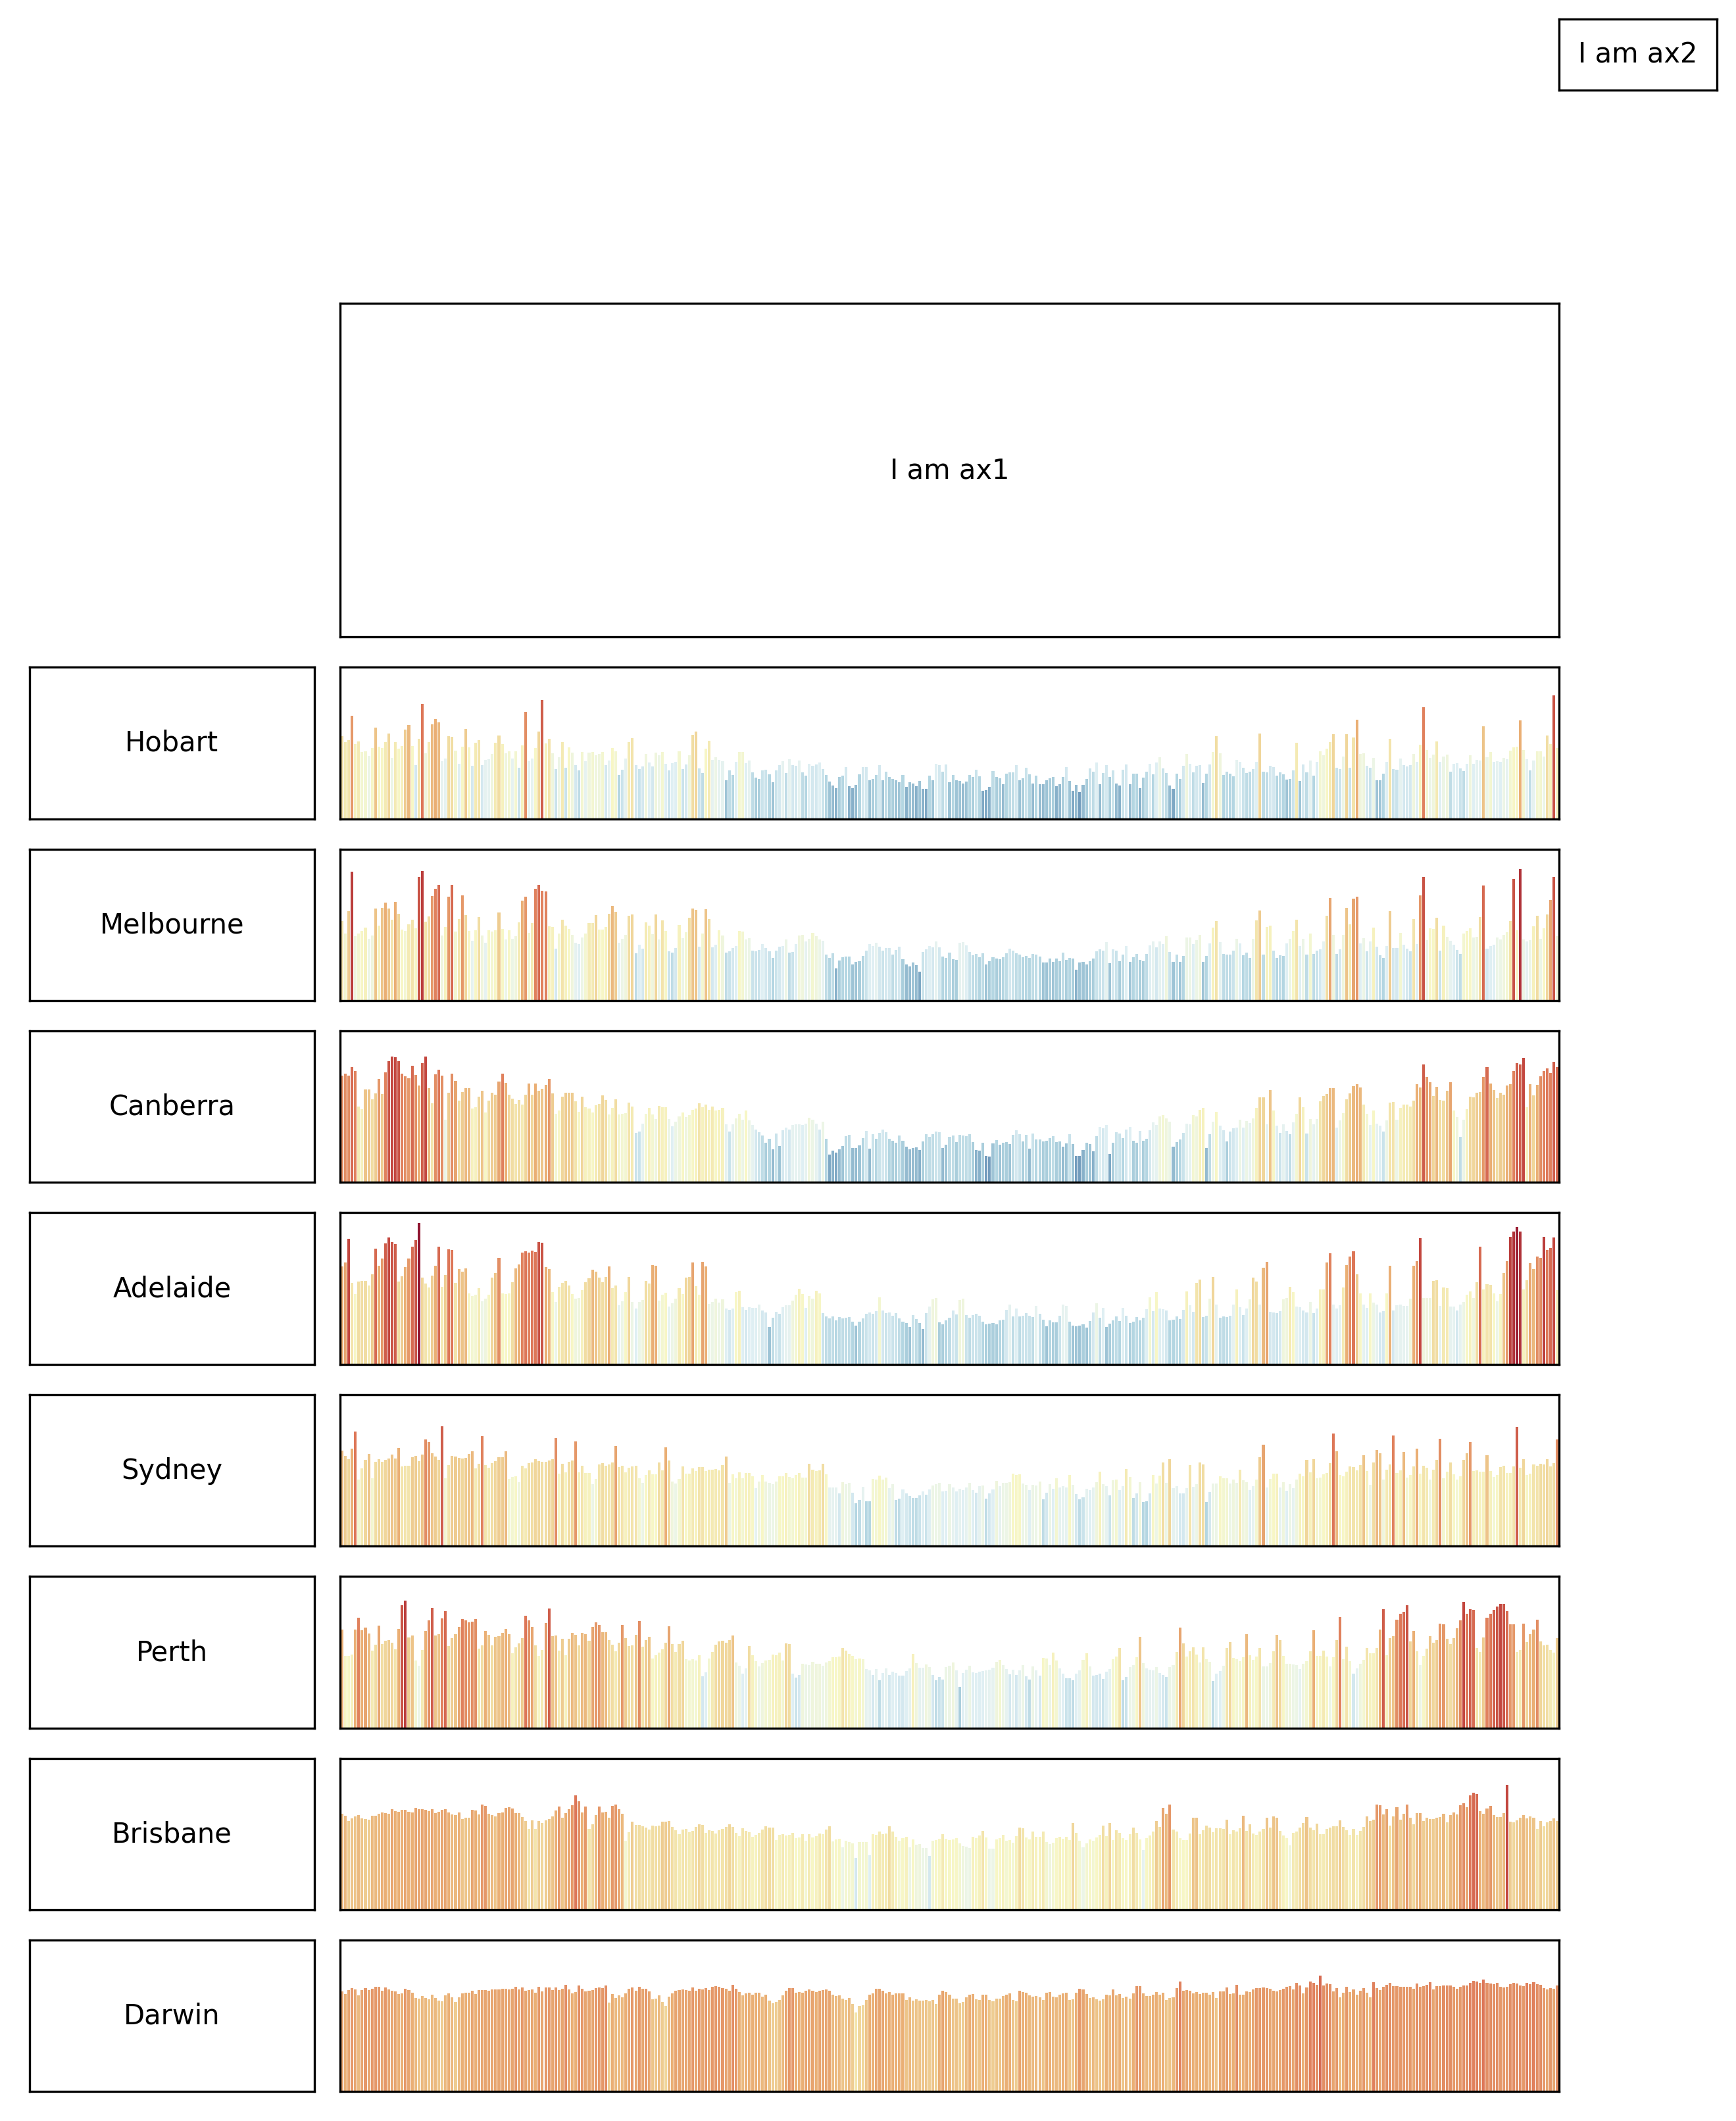

In [13]:
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

gs = fig.add_gridspec(nrows=10, ncols=10)

axText = fig.add_subplot(gs[0:2, 2:10])
axText.annotate('I am ax1', (0.5, 0.5), 
                xycoords='axes fraction', va='center', ha='center')
axText.get_xaxis().set_visible(False)
axText.get_yaxis().set_visible(False)

axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)
axInlet.annotate('I am ax2', (0.5, 0.5),
                 xycoords='axes fraction', va='center', ha='center')
axInlet.get_xaxis().set_visible(False)
axInlet.get_yaxis().set_visible(False)


##obtenemos nuestro colormap
color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  


for i, city in enumerate(cityList):
    sub_df = df[df['City'] == city] #Obtenemos el subconjunto de datos para cada ciudad
    #transformamos a 0 y 1, y obtenemos los valores asociados para cada barra segun la ciudad
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    #Generamos el eje
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    #graficamos nuestro grafico de barras
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Añadimos la ciudad correspondiente a modo de texto
for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.show()

Vamos a generar anotaciones, específicamente destacar cual fue la mayor temperatura en el año y luego la menor temperatura. Para esto vamos a utilizar el método `ax.annotate`. Dado que no procesamos la fecha (columna 'Date'), los valores existentes en el eje X, va a corresponder internamente a valores numéricos, con etiquetas asociadas a su fecha. Dado esta información, si queremos destacar la barra específica, necesitamos saber en qué día del año corresponde a eso. Suerte para nosotros, podemos reutilizar el índice de nuestro `sub_df` para encontrar ese día en el año para cada ciudad.

In [14]:
#Lo primero que tenemos que hacer eso si, es reiniciar el indice númerico, principalmente debido a que 
# si bien filtramos el DataFrame, los indices originales se mantienen.
sub_df.reset_index(drop=True)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
0,1095,IDCJAC0010,14015,2019,1,1,33.1,1.0,N,darwin,2019-01-01
1,1096,IDCJAC0010,14015,2019,1,2,32.3,1.0,N,darwin,2019-01-02
2,1097,IDCJAC0010,14015,2019,1,3,33.5,1.0,N,darwin,2019-01-03
3,1098,IDCJAC0010,14015,2019,1,4,34.2,1.0,N,darwin,2019-01-04
4,1099,IDCJAC0010,14015,2019,1,5,33.7,1.0,N,darwin,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...
360,1455,IDCJAC0010,14015,2019,12,27,34.2,1.0,N,darwin,2019-12-27
361,1456,IDCJAC0010,14015,2019,12,28,33.8,1.0,N,darwin,2019-12-28
362,1457,IDCJAC0010,14015,2019,12,29,34.2,1.0,N,darwin,2019-12-29
363,1458,IDCJAC0010,14015,2019,12,30,33.9,1.0,N,darwin,2019-12-30


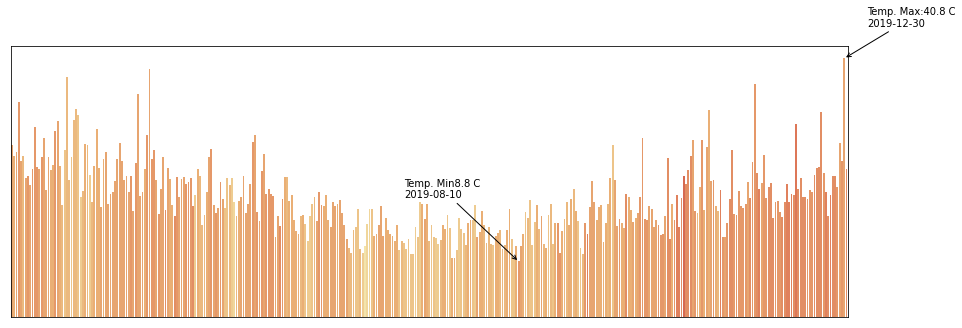

In [15]:
#vamos a seguir prototipando, especificamente las anotaciones
plt.figure(figsize=(15,5))

sub_df = df[df['City'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

#con los indices reiniciados, graficamos
ax = sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#ahora vamos a calcular el valor de temperatura mas alto para la ciudad de hobart
highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date #Extraemos la fecha que tenga la temperatura mas alta en el subconjunto
highTemp = sub_df.max_tmp_day.max() # y calculamos el valor mas alto

ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]), #Generamos nuestra anotación indicando el valor y fecha 
    xy=(highDate.index[0], highTemp), xycoords='data', # Ubicamos el inicio de la anotación, donde en la cordenada x va a corresponder al indice de la fecha con la temperatura mas alta (highDate.index[0]) y el valor Y es la temperatura mas alta
    xytext=(highDate.index[0]+10, highTemp+5), textcoords='data', #Luego el texto lo instanciamos en desplazado de nuestras cordenadas xy
    size=10, #detallamos un tamaño
    color='#000000',#color para el texto
    arrowprops=dict(arrowstyle="->", #y caracteristicas para la flecha indicativa
                    connectionstyle="arc3",
                    color='#000000')
   )


#Para calcular la anotación de la temperatyra minima, el proceso es igual, solo que en vez la funcion max, utilizamos la funcion min
lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
lowTemp = sub_df.max_tmp_day.min()
ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
            xy=(lowDate.index[0], lowTemp), xycoords='data',
            xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
            size=10,
            color='#000000',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color='#000000')
           )

plt.show()

In [16]:
#Solo para comprobar que es HighDate y por que podemos extraer el indice como fecha asociada: 
highDate

363    2019-12-30
Name: Date, dtype: object

Modificamos el loop donde se generan las visualizaciones, para añadir ahora las anotaciones según la ciudad:

/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


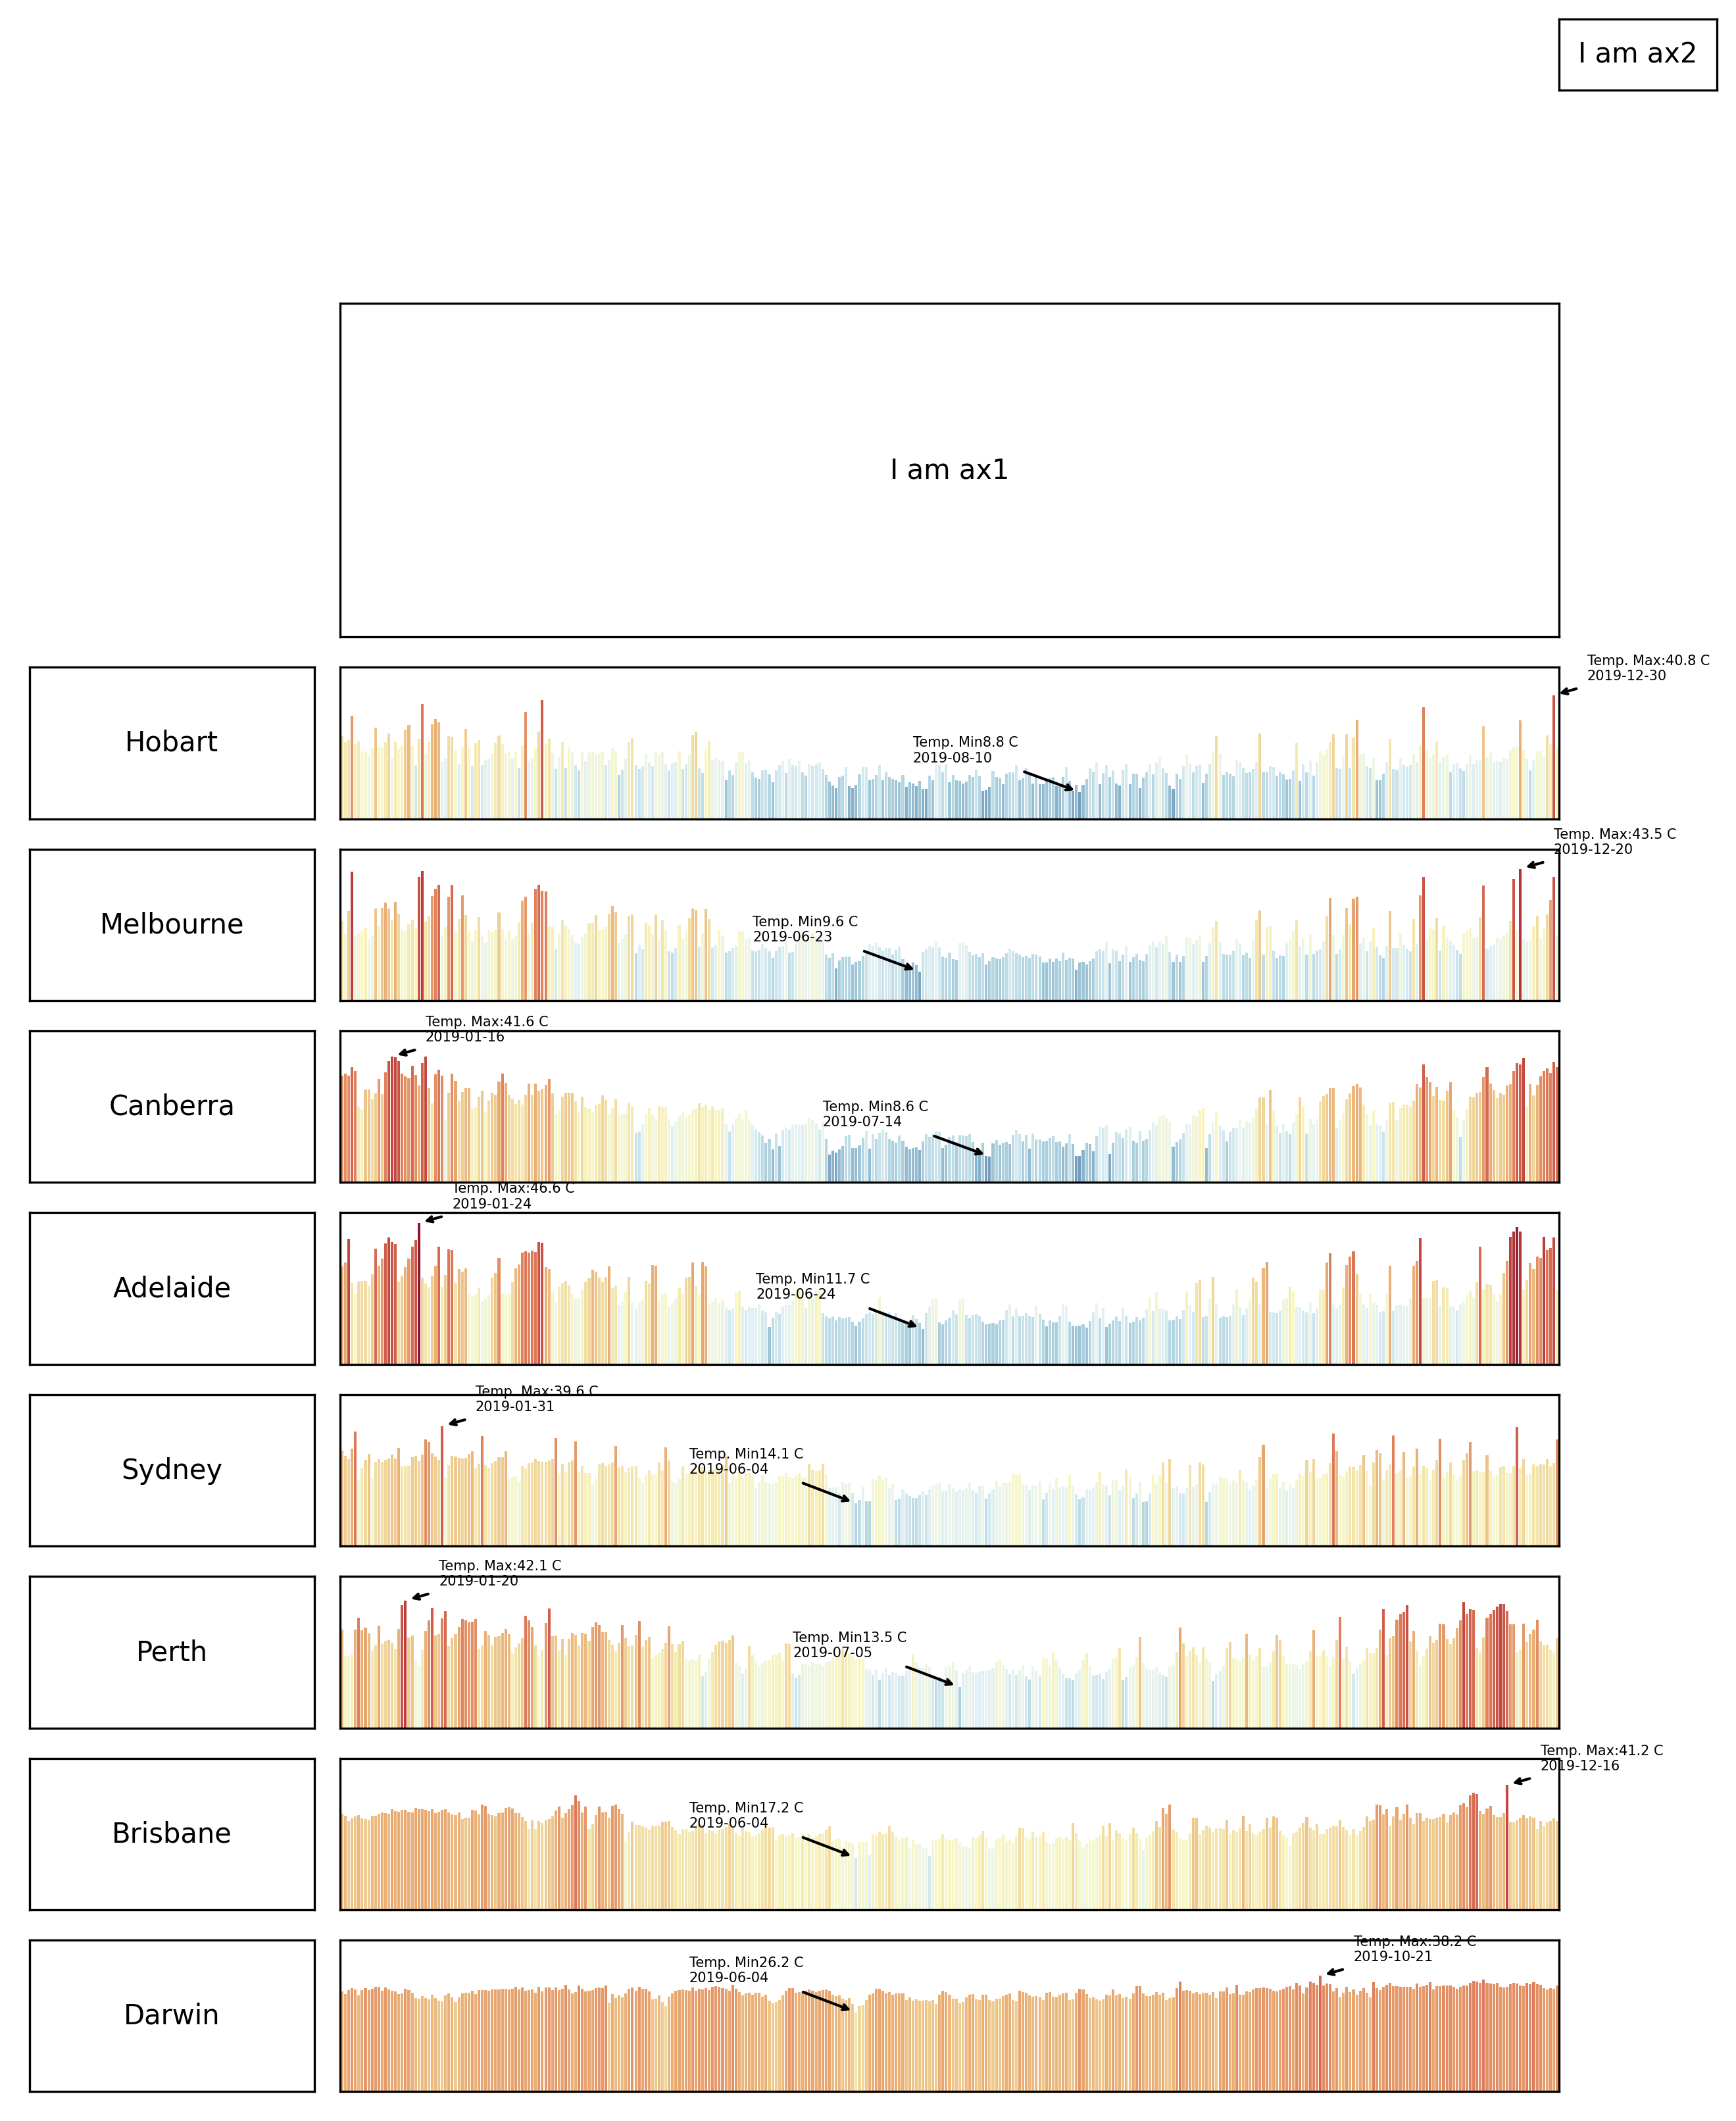

In [17]:
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

gs = fig.add_gridspec(nrows=10, ncols=10)

axText = fig.add_subplot(gs[0:2, 2:10])
axText.annotate('I am ax1', (0.5, 0.5), 
                xycoords='axes fraction', va='center', ha='center')
axText.get_xaxis().set_visible(False)
axText.get_yaxis().set_visible(False)

axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)
axInlet.annotate('I am ax2', (0.5, 0.5),
                 xycoords='axes fraction', va='center', ha='center')
axInlet.get_xaxis().set_visible(False)
axInlet.get_yaxis().set_visible(False)

color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  

for i, city in enumerate(cityList):
    sub_df = df[df['City'] == city]
    #Reiniciamos el indice
    sub_df = sub_df.reset_index(drop=True) 
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #Calculamos la fecha y temperatura
    highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
    highTemp = sub_df.max_tmp_day.max()
    
    #Generamos la anotacion para la temperatura maxima
    ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
        xy=(highDate.index[0], highTemp), xycoords='data',
        xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
        size=5,
        color='#000000',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color='#000000')
       )


    #Generamos la anotacion para la temperatura minima
    lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
    lowTemp = sub_df.max_tmp_day.min()
    ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
                xy=(lowDate.index[0], lowTemp), xycoords='data',
                xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
                size=5,
                color='#000000',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                                color='#000000')
               )

# Añadimos la ciudad correspondiente
for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.show()

Vamos a añadir ahora la barra de color (para tener la referencia) y editar el ax1, para indicar a que mes corresponde cada sección de barras. Con eso tendremos referencias valor/fechas para nuestra infografía

<ipython-input-18-cb754330cd2f>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 10}) #Finalmente pintamos las nuevas etiquetas para los valores de los ticks


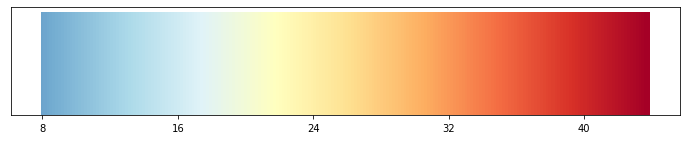

In [18]:
#Existe un objeto en matplotlib, el cual nos permite modificar los ticks en los ejes X e Y. 
# Esto nos va a ser util para generar nuestra barra de color
from matplotlib.ticker import MultipleLocator #Especificamente, vamos a importar el MultipleLocator

#Generamos un plot
fig, ax = plt.subplots(figsize=(12,2))

#Vamos a generar dos vectores de largo 1800.
xLegend = np.linspace(0, 179, 1800) #el primero va a ser nuestro eje X
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800) # El segundo nuestros valores de Y

#Quitamos grillas y dejamos invisibles el eje Y
ax.grid(False)
ax.get_yaxis().set_visible(False)

#Vamos a generar nuestra paleta de colores, transformando yLegend para los valores 0 y 1 dadas los valores maximos y minimos de nuestro sed de datos
colors = color_p(yLegend / max(yLegend))

# Se genera la barra e yLegend lo elevamos a 0 ¿Porque creen que hacemos esto :)?
ax.bar(xLegend, yLegend**0,  color=colors, align="center")

ax.tick_params(axis="x", direction="out", pad=5) #Definimos parametros para cada Tick del eje X
#MultipleLocator, va a generar una barra en todas los valores numericos que sean multiplos de el parametro asignado
ax.xaxis.set_major_locator(MultipleLocator(40)) #redefinimos los valores del eje X, en este caso en multiplos de 40
ax.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 10}) #Finalmente pintamos las nuevas etiquetas para los valores de los ticks


plt.show()

Para poder pintar la referencia de los meses, vamos a utilizar la librería calendar, la cual tiene una lista con los meses abreviados:

In [19]:

import calendar
#Imprimimos todos los meses de la libreria calendar
calendar.month_abbr[1:]

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Vamos a importar otro método para definir los ticks, específicamente `FixedLocator`. Este método recibe como parámetro una lista y va a generar los ticks correspondientes a los valores de la lista como tal. En este caso, necesitamos encontrar los índices para los distintos fines de mes existentes en nuestro set de datos

In [20]:
#Importamos la libreria
from matplotlib.ticker import  FixedLocator

In [21]:
#Luego, por cada mes existente en nuestro set de datos, vamos a obtener el indice mas grande correspondiente a cada mes
#Como este valor, coincide con un dia especifico, lo vamos a utilizar para generar nuestros nuevos valores para los ticks del eje X
month_idxs = [0] + [max(sub_df[sub_df.Month == i].index) for i in range(1,13)] # concatenamos a [0], el arreglo con los dias del fin de mes de nuestro set de datos
month_idxs #Luego los imprimimos

[0, 30, 58, 89, 119, 150, 180, 211, 242, 272, 303, 333, 364]

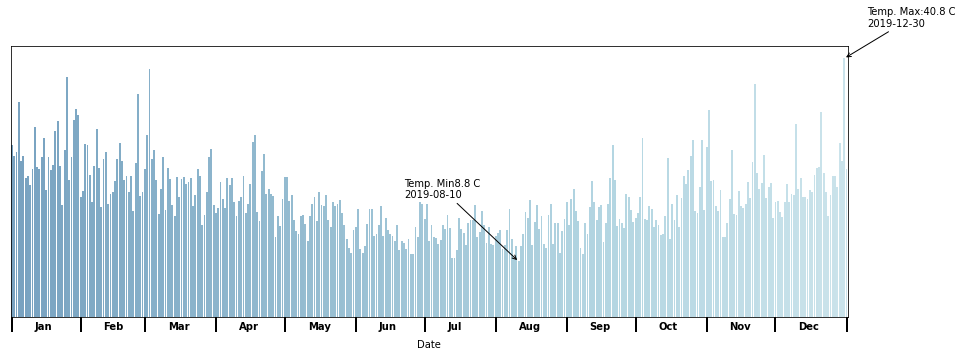

In [22]:
plt.figure(figsize=(15,5))
#De nuevo, prototipando con hobart
sub_df = df[df['City'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

ax = sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors)
ax.get_yaxis().set_visible(False)


# Modificamos unos parametros del eje X, principalmente darle mas ancho a las barritas, y aumentando la longitud de estos
ax.tick_params(axis="x", direction="out", which='major', width=2, length=15)

ax.xaxis.set_major_locator(FixedLocator(month_idxs)) # Utilizamos el arreglo de indices de meses, para generar los nuevos ticks
ax.set_xticklabels([""] * len(month_idxs))# Dejamos vacio los valores de cada tick existente 

#Luego vamos a generar unas anotaciones en el eje de las X, cada uno de los meses existentes en la lista de abreviaciones
for i, mon in enumerate(calendar.month_abbr[1:13]):
    ax.text(month_idxs[i] + 10, -2, mon, color='#000000', fontweight='bold') # y vamos a colocar dicho texto, entre cada uno de los ticks del eje X

#Luego aca se calcula todo por igual
highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
highTemp = sub_df.max_tmp_day.max()

ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
    xy=(highDate.index[0], highTemp), xycoords='data',
    xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
    size=10,
    color='#000000',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3",
                    color='#000000')
   )



lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
lowTemp = sub_df.max_tmp_day.min()
ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
            xy=(lowDate.index[0], lowTemp), xycoords='data',
            xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
            size=10,
            color='#000000',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color='#000000')
           )

plt.show()



Con esto, ahora tenemos una aproximación para cada barra en la figura, a que mes corresponde. Vamos a aprovechar este mismo código, pero volviendo transparentes los datos que estamos graficando. Con esto solo nos debería quedar el eje X con las delimitaciones generadas. Además, vamos a agregar nuestra barra de referencia

<ipython-input-23-7a96f98aa859>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})
/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


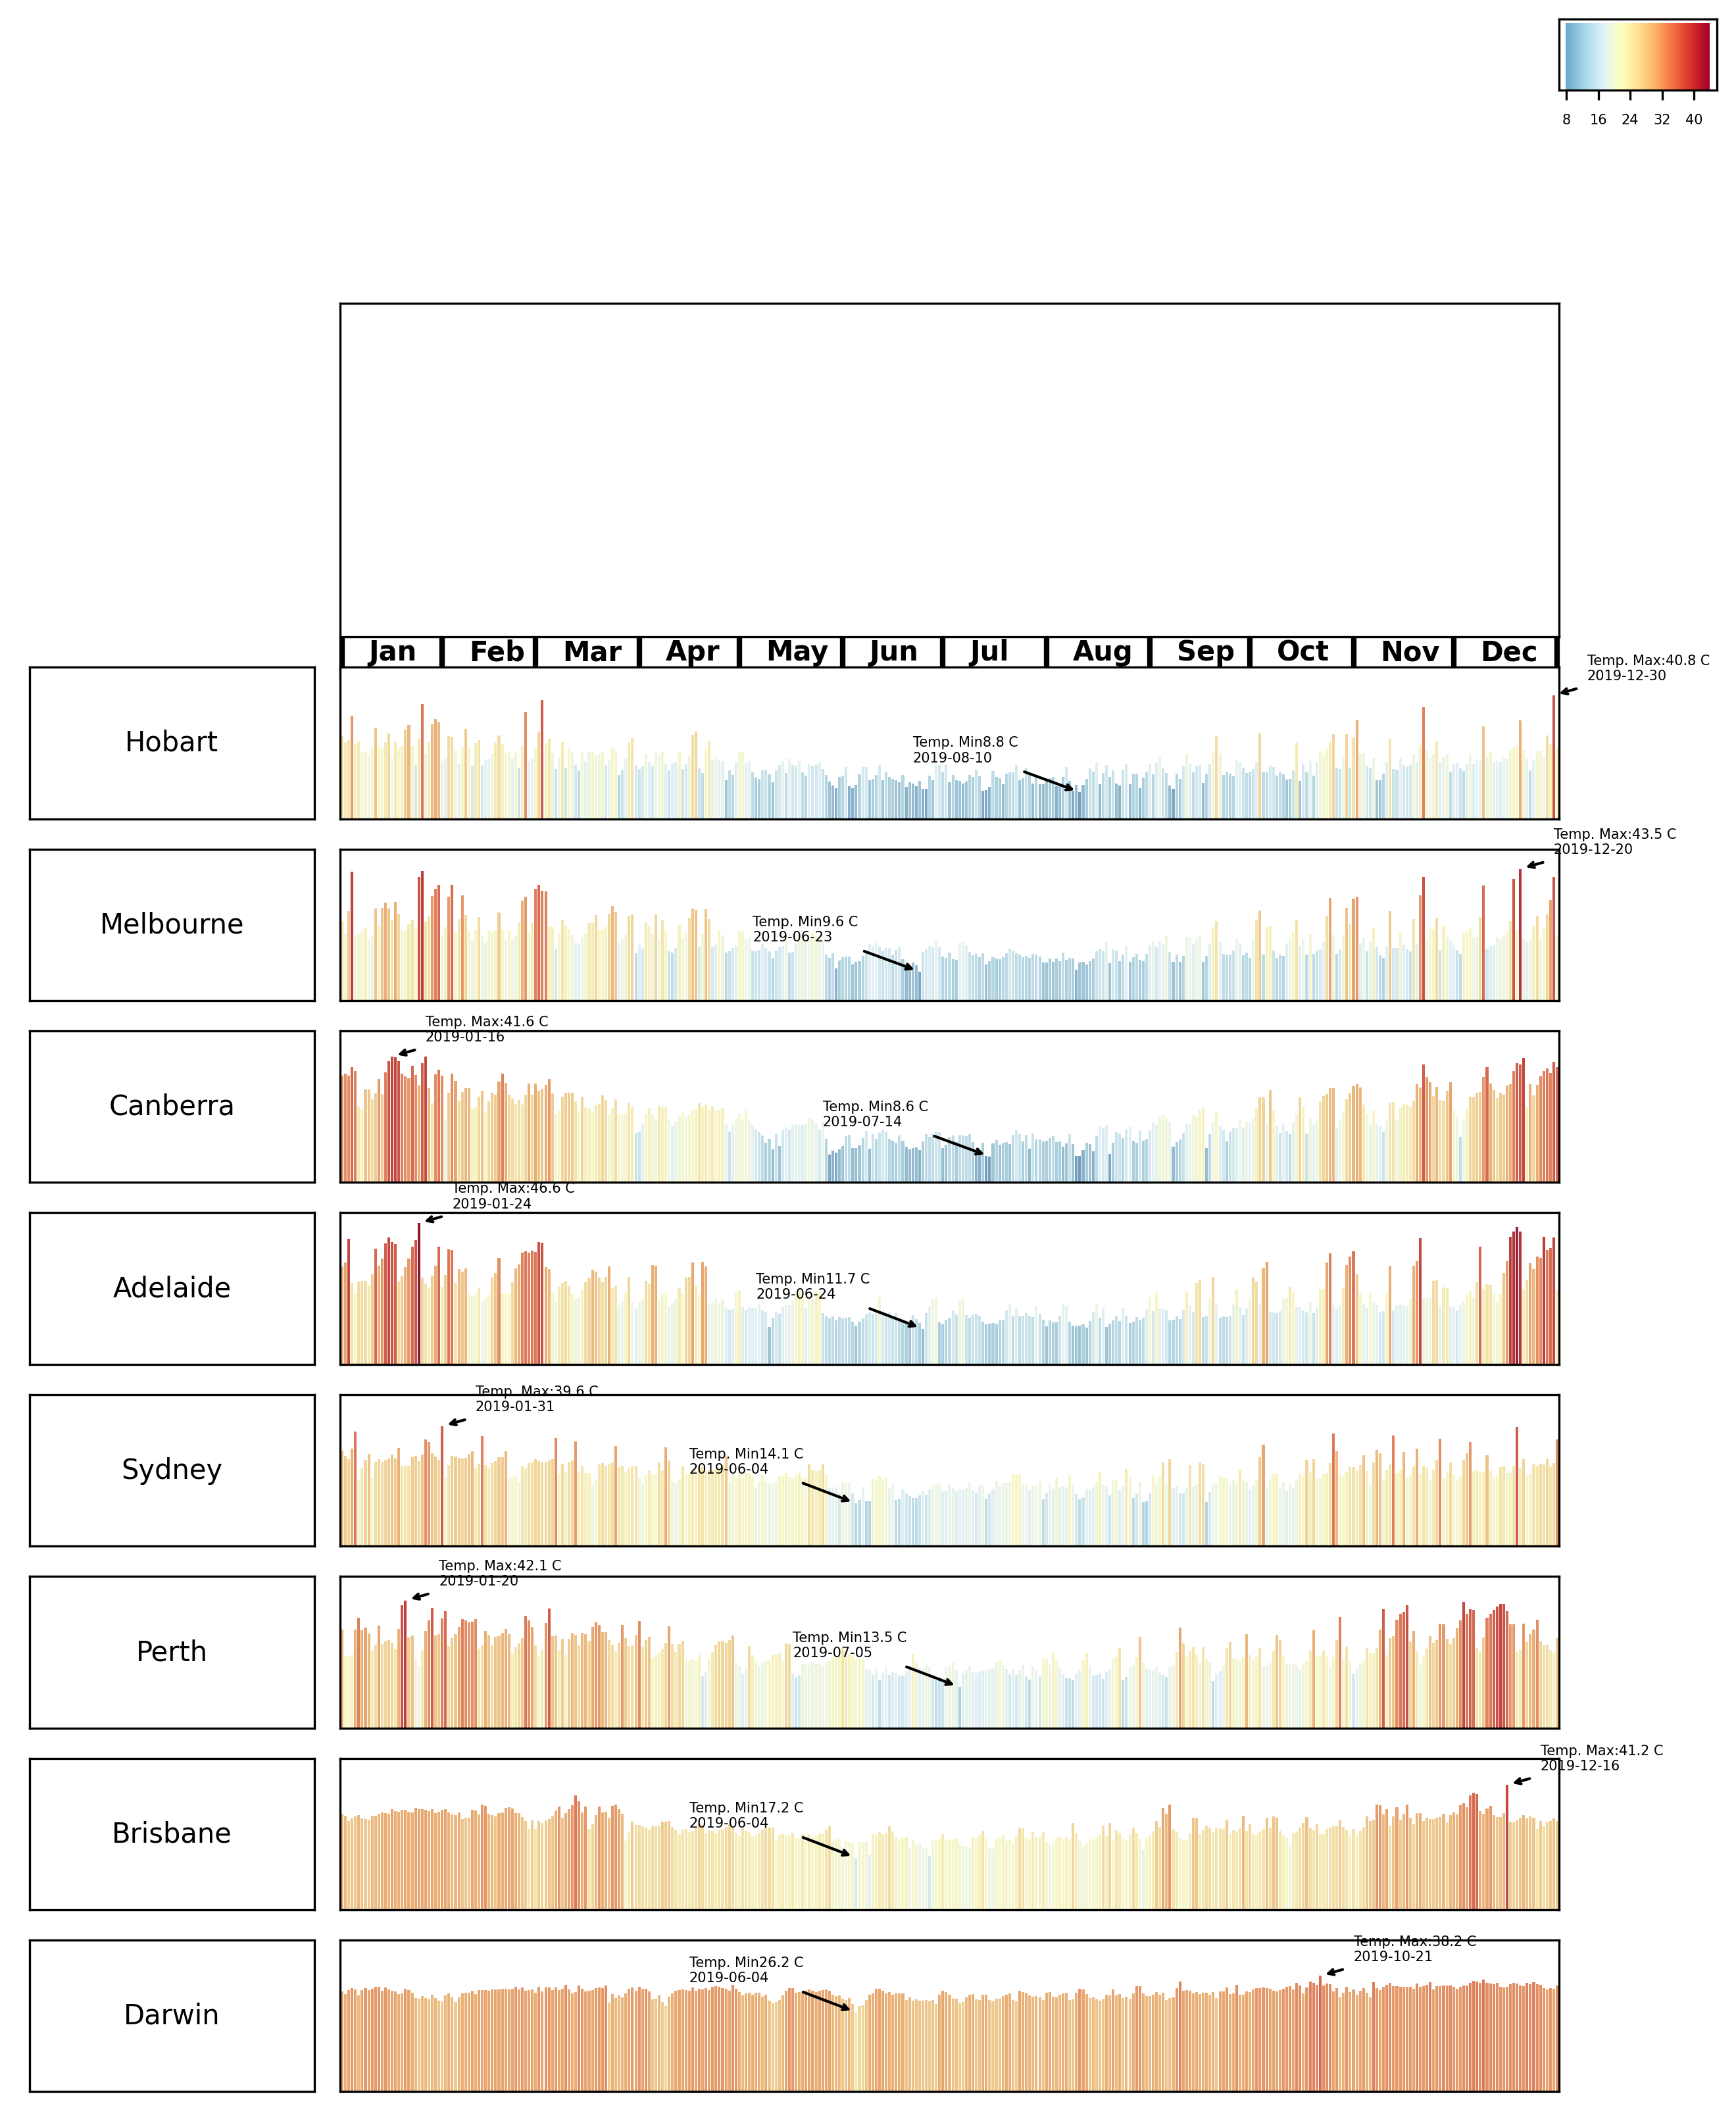

In [23]:
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

gs = fig.add_gridspec(nrows=10, ncols=10)

#Tomamos el subplot asociado al primer cuadrante que nosotros generamos
ax = fig.add_subplot(gs[0:2, 2:])

sub_df = df[df['City'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

#Generamos el barplot, pero con alpha 0 para que no se muestre
sns.barplot(x=sub_df['Date'],y=sub_df["max_tmp_day"], alpha = 0,ax=ax)
#ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#ajustamos los valores de los ticks del eje X
ax.tick_params(axis="x", direction="out", which='major', width=2, length=15)

#Fijamos los ticks para realizar las separaciones mensuales
ax.xaxis.set_major_locator(FixedLocator(month_idxs)) 
ax.set_xticklabels([""] * len(month_idxs))

#Colocamos los meses entre cada tick (ajustando los valores x,y)
for i, mon in enumerate(calendar.month_abbr[1:13]):
    ax.text(month_idxs[i] + 8, -3, mon, color='#000000', fontweight='bold')


axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)

# Aprovechamos el subplot generado por sobre el primer AX, para pintar nuestra barra de color
xLegend = np.linspace(0, 179, 1800)
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800)
axInlet.grid(False)
axInlet.get_yaxis().set_visible(False)

colors = color_p(yLegend / max(yLegend))
axInlet.bar(xLegend, yLegend**0, label='_1', color=colors, align="center")

axInlet.tick_params(axis="x", direction="out", pad=5)
axInlet.xaxis.set_major_locator(MultipleLocator(40))
axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})

color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  



for i, city in enumerate(cityList):
    sub_df = df[df['City'] == city]
    sub_df = sub_df.reset_index(drop=True)
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
    highTemp = sub_df.max_tmp_day.max()

    ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
        xy=(highDate.index[0], highTemp), xycoords='data',
        xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
        size=5,
        color='#000000',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color='#000000')
       )



    lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
    lowTemp = sub_df.max_tmp_day.min()
    ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
                xy=(lowDate.index[0], lowTemp), xycoords='data',
                xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
                size=5,
                color='#000000',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                                color='#000000')
               )

for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.show()

Ya tenemos nuestra infografía tentativa. Ahora tenemos que modificar parámetros generales de nuestra figura para poder generar un output estéticamente atrayente. Para esto, vamos a modificar los valores de los parámetros de visualización del backend, de forma manual. En cierta medida, cuando llamamos `sns.set()`, este método hacer todas las modificaciones necesarias para obtener el estilo clásico de seaborn. Para nuestra infografía, vamos a utilizar colores sobrios, cercanos a negro (para nuestro fondo) y cercanos al blanco para las anotaciones.

In [24]:
plt.rc('figure', facecolor='#222222') # Para la figura, generamos nuestro color de fondo al color #22222
plt.rc('axes', facecolor='#222222', edgecolor='#222222', # Para cada eje, el color de fondo y de borde van a ser de #222222
       axisbelow=True, grid=True) # "axisbelow" va a permitir que los ejes se pinten con ultima prioridad (si se pinta algo encima, los ejes siempre permaneceran atras)
plt.rc('grid', color='#e3e3e3', linestyle='solid') #Se define el color de la grilla 
plt.rc('xtick', direction='in', color='#e3e3e3') #Los valores para cada xtick
plt.rc('ytick', direction='in', color='#e3e3e3') # e ytick 
plt.rc('patch', edgecolor='#e3e3e3') # objeto generico de matplotlib
plt.rc('lines', linewidth=1.5) #ancho de linea


<ipython-input-25-8525036c1c3a>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})
/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


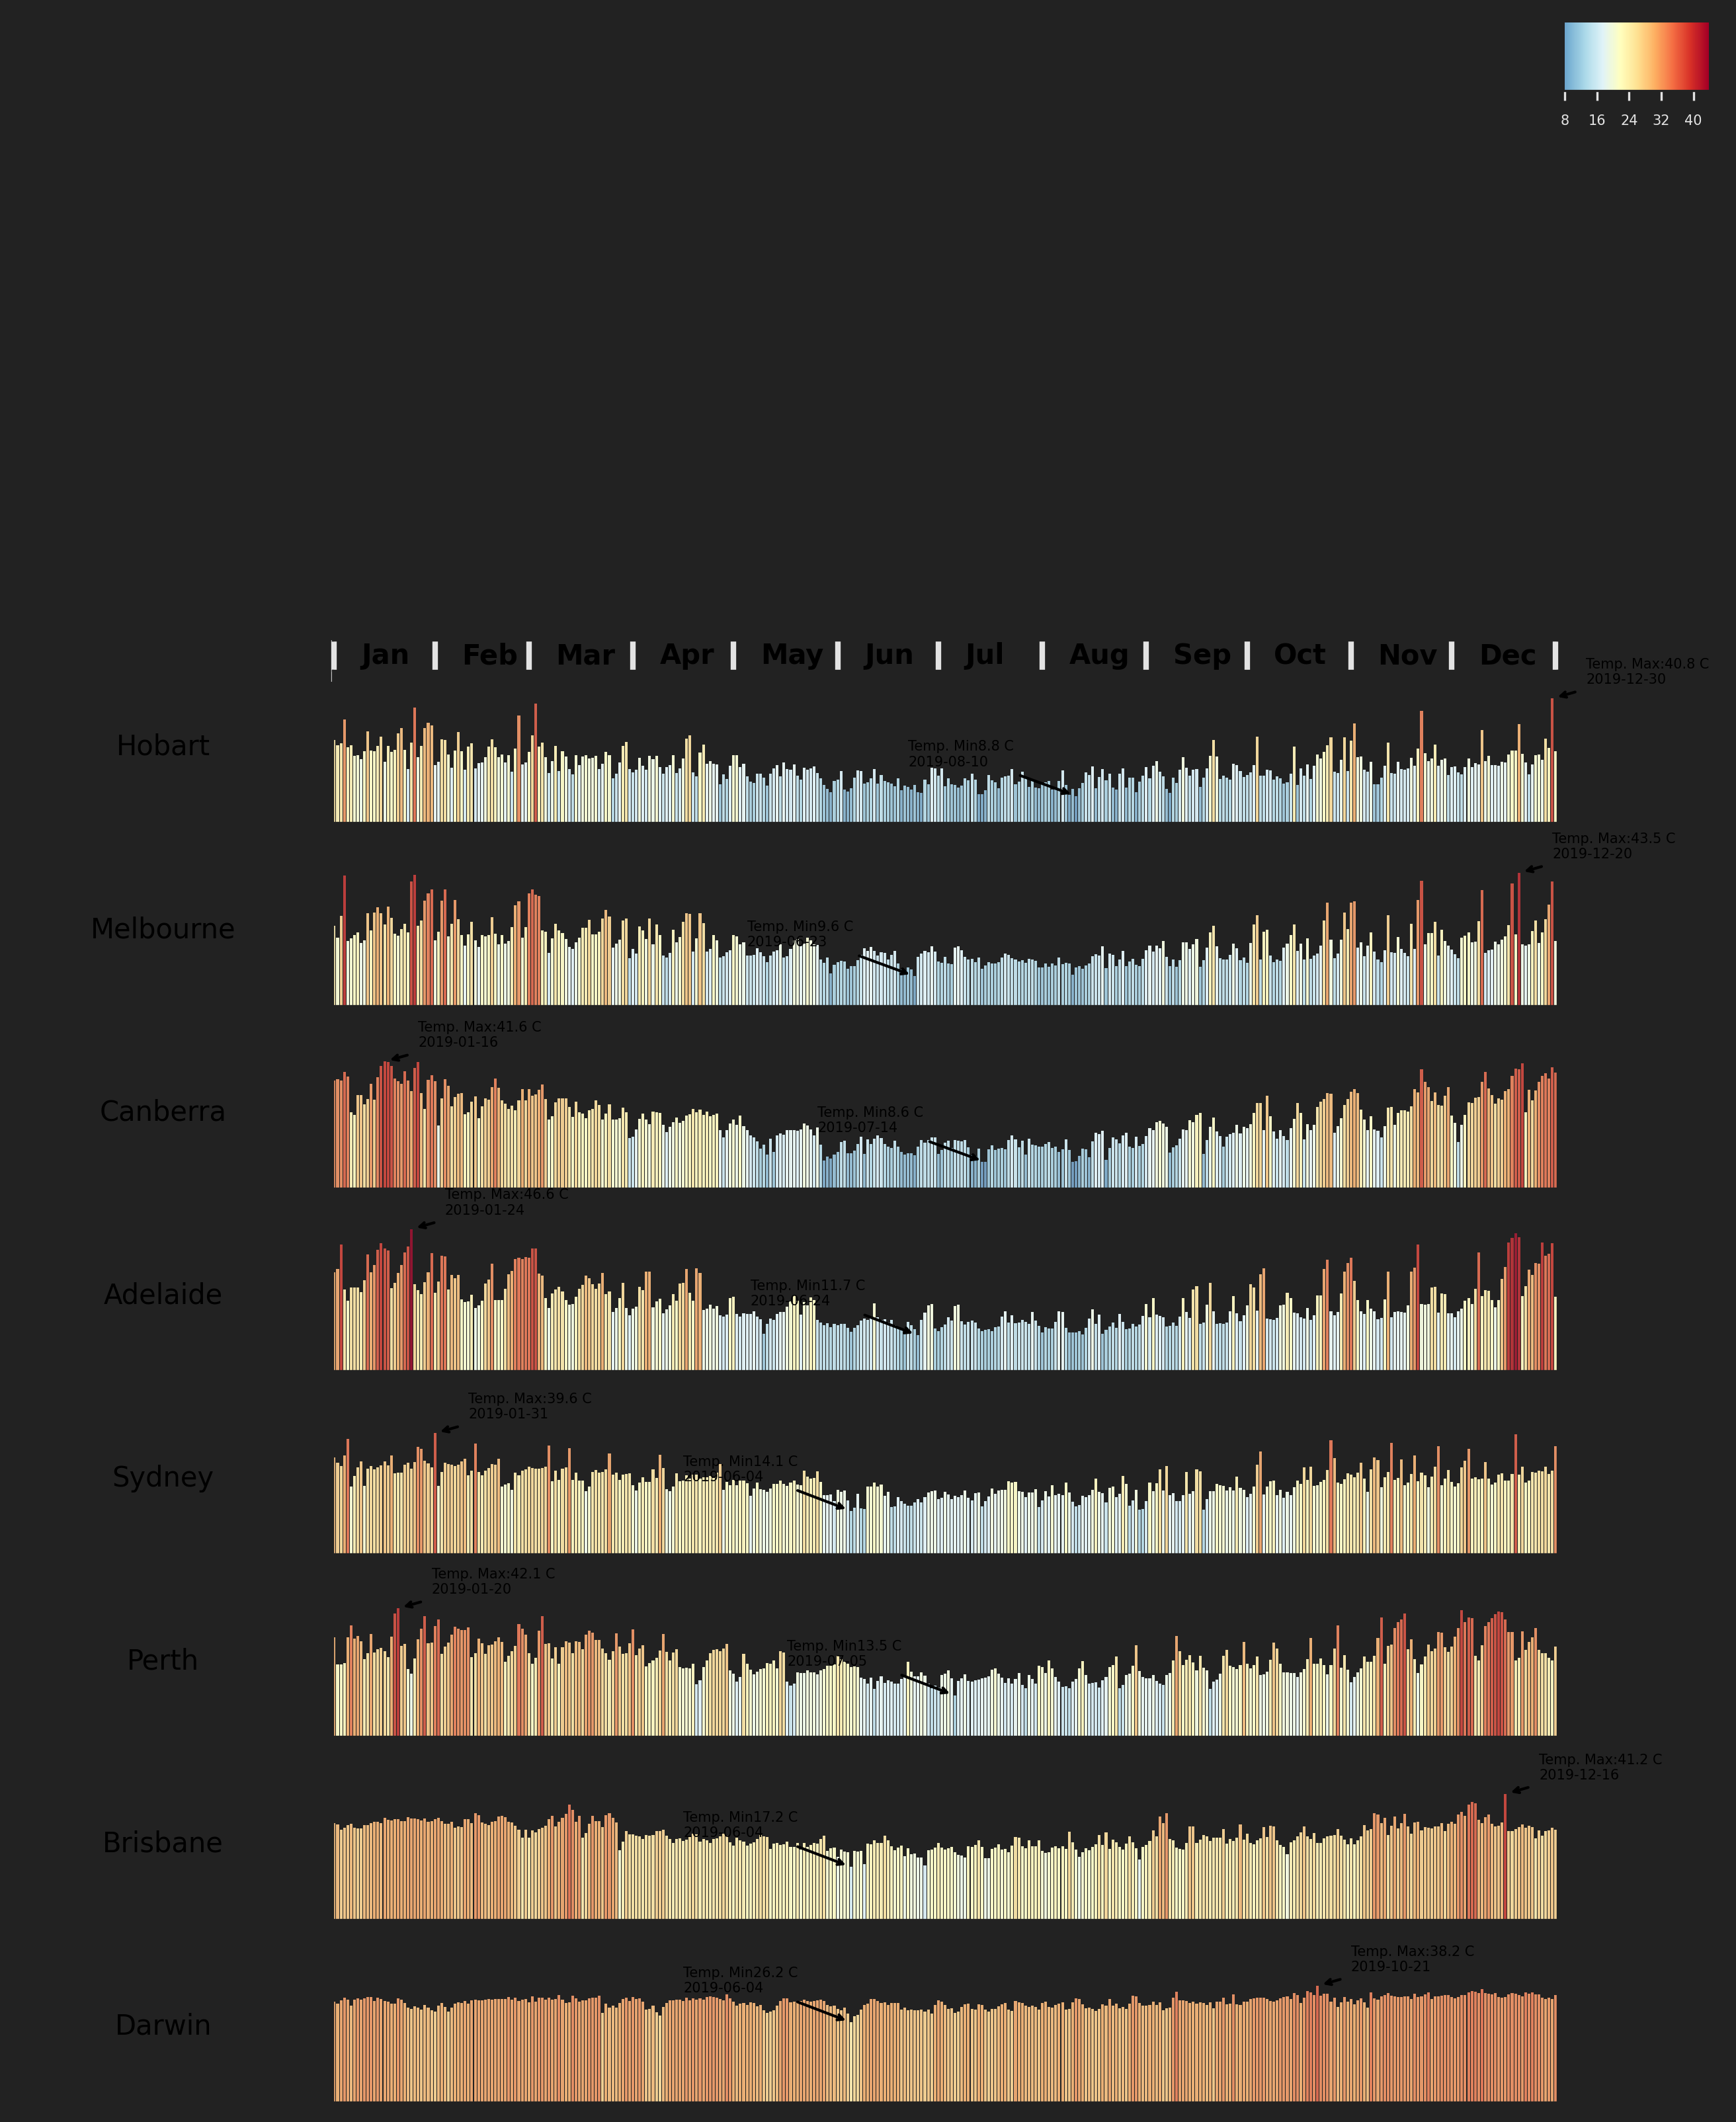

In [25]:
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

gs = fig.add_gridspec(nrows=10, ncols=10)

ax = fig.add_subplot(gs[0:2, 2:])

sub_df = df[df['City'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

sns.barplot(x=sub_df['Date'],y=sub_df["max_tmp_day"], alpha = 0,ax=ax)
ax.get_yaxis().set_visible(False)

ax.tick_params(axis="x", direction="out", which='major', width=2, length=15)

ax.xaxis.set_major_locator(FixedLocator(month_idxs)) 
ax.set_xticklabels([""] * len(month_idxs))

for i, mon in enumerate(calendar.month_abbr[1:13]):
    ax.text(month_idxs[i] + 8, -3, mon, color='#000000', fontweight='bold')

axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)

xLegend = np.linspace(0, 179, 1800)
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800)
axInlet.grid(False)
axInlet.get_yaxis().set_visible(False)

colors = color_p(yLegend / max(yLegend))
axInlet.bar(xLegend, yLegend**0, label='_1', color=colors, align="center")

axInlet.tick_params(axis="x", direction="out", pad=5)
axInlet.xaxis.set_major_locator(MultipleLocator(40))
axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})

color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  



for i, city in enumerate(cityList):
    sub_df = df[df['City'] == city]
    sub_df = sub_df.reset_index(drop=True)
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
    highTemp = sub_df.max_tmp_day.max()

    ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
        xy=(highDate.index[0], highTemp), xycoords='data',
        xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
        size=5,
        color='#000000',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color='#000000')
       )



    lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
    lowTemp = sub_df.max_tmp_day.min()
    ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
                xy=(lowDate.index[0], lowTemp), xycoords='data',
                xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
                size=5,
                color='#000000',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                                color='#000000')
               )

for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.show()

Nuestra infografía esta casi lista, solo nos queda cambiar los colores de las anotaciones y el texto presente en cada uno de los elementos. Por lo mismo, vamos a definir dos variables: una para el color de fondo y otra para el color del texto y ejes necesarios. Luego, cualquier instancia que necesite color, la reemplazamos con estos valores:

In [26]:
c_fondo = "#222222" #Color de fondo
c_texto = "#e3e3e3" #Color de texto


from matplotlib import cycler
plt.rc('figure', facecolor=c_fondo)
plt.rc('axes', facecolor=c_fondo, edgecolor=c_fondo,
       axisbelow=False, grid=True) 
plt.rc('grid', color=c_fondo, linestyle='solid')
plt.rc('xtick', direction='in', color=c_texto)
plt.rc('ytick', direction='in', color=c_texto)
plt.rc('patch', edgecolor=c_fondo)
plt.rc('lines', linewidth=1.5)
plt.rc('savefig', facecolor=c_fondo) #Añadimos el color de fondo al momento de guardar la figura



In [30]:
#Reemplazamos todas las instancias de '#000000' por c_texto !!!

cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

#fig.suptitle('Infografía', fontsize=16, color = 'c_texto')

gs = fig.add_gridspec(nrows=10, ncols=10)

ax = fig.add_subplot(gs[0:2, 2:])

sub_df = df[df['City'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

sns.barplot(x=sub_df['Date'],y=sub_df["max_tmp_day"], alpha = 0,ax=ax)
ax.get_yaxis().set_visible(False)

ax.tick_params(axis="x", direction="out", which='major', width=2, length=15)

ax.xaxis.set_major_locator(FixedLocator(month_idxs)) 
ax.set_xticklabels([""] * len(month_idxs))
ax.set_xlabel("")

for i, mon in enumerate(calendar.month_abbr[1:13]):
    ax.text(month_idxs[i] + 8, -3, mon, color=c_texto, fontweight='bold')

axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)

xLegend = np.linspace(0, 179, 1800)
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800)
axInlet.grid(False)
axInlet.get_yaxis().set_visible(False)

colors = color_p(yLegend / max(yLegend))
axInlet.bar(xLegend, yLegend**0, label='_1', color=colors, align="center")

axInlet.tick_params(axis="x", direction="out", pad=5)
axInlet.xaxis.set_major_locator(MultipleLocator(40))
axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})

color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  



for i, city in enumerate(cityList):
    sub_df = df[df['City'] == city]
    sub_df = sub_df.reset_index(drop=True)
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
    highTemp = sub_df.max_tmp_day.max()

    ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
        xy=(highDate.index[0], highTemp), xycoords='data',
        xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
        size=5,
        color=c_texto,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color=c_texto)
       )



    lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
    lowTemp = sub_df.max_tmp_day.min()
    ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
                xy=(lowDate.index[0], lowTemp), xycoords='data',
                xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
                size=5,
                color=c_texto,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                                color=c_texto)
               )

for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),color=c_texto,
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.savefig("infografia.png") # Salvamos la infografia en un archivo PNG
plt.show()

<ipython-input-30-1d35e3e42435>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})
<ipython-input-30-1d35e3e42435>:91: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig("infografia.png") # Salvamos la infografia en un archivo PNG


ValueError: Invalid RGBA argument: 'c_texto'

/home/bastian/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Invalid RGBA argument: 'c_texto'

<Figure size 3000x3600 with 20 Axes>

# Dinámica Infografía
La dinámica para la infografía va a ser bastante sencilla, dado todo el trabajo que implica crear una infografía desde cero. Por lo mismo, lo que deben realizar seria:

- Arreglar las posiciones de las etiquetas de las temperaturas mínimas y máximas
- Agregar un título con letras grandes: "Temperaturas para el año 2019 en Australia"
- Agregar un subtítulo con letras más pequeñas: "El año 2019 ha sido un año inolvidable para los australianos. Altas temperaturas y poca lluvia han marcado valores récords en la historia de este país, más aun, han contribuido activamente a los incendios forestales de dicha nación. Aquí veremos cómo se desarrollan las temperaturas para distintas ciudades y marcando los valores máximos y mínimos"
- Agregar en la esquina superior izquierda la interpretación de la infografía: "Cómo leer la infografía: \n Cada ciudad es representada por una fila de líneas verticales, una por cada día en el 2019. La altura de cada línea corresponde a la temperatura máxima alcanzada para esa ciudad en un día específico. Los máximos y mínimos de las temperaturas anuales para cada ciudad son marcados con flechas"

**Desafío**: En este caso el desafío corresponde a agregar información adicional a nuestra infografía. Los niveles de lluvia anuales para cada ciudad. Para esto van a leer un nuevo dataframe obtenido de la siguiente forma:

```python
path = "http://srodriguez.me/Datasets/rainfall_cities.csv"
rain_df = pd.read_csv(path)
rain_df.head()
```
Este dataframe contiene la columna total_rainfall, el cual contiene el valor de la lluvia anual para cada ciudad. Modifique la infografía para incorporar esta información en el lado derecho, ya sea ingresando los valores como texto, o en su defecto adaptando alguno de los posibles gráficos existentes en el ecosistema `matplotlib`/`seaborn`. Como consejo, ocupe las dos últimas columnas para realizar esta esta modificación a la infografía. (y por consiguiente, modificar la cantidad de columnas que ocupan los gráficos de barra).


In [31]:
path = "http://srodriguez.me/Datasets/rainfall_cities.csv"
rain_df = pd.read_csv(path)
rain_df.head()

,city,total_rainfall,normalized_rainfall,recalc_rainfall
0,hobart,385.0,1.075419,119.199441
1,melbourne,441.0,51.233240,136.692346
2,canberra,372.8,1.041341,115.422212
3,adelaide,358.0,1.000000,110.840000
4,sydney,851.8,2.379330,263.724894


In [33]:
df = rain_df

KeyError: 'Date'

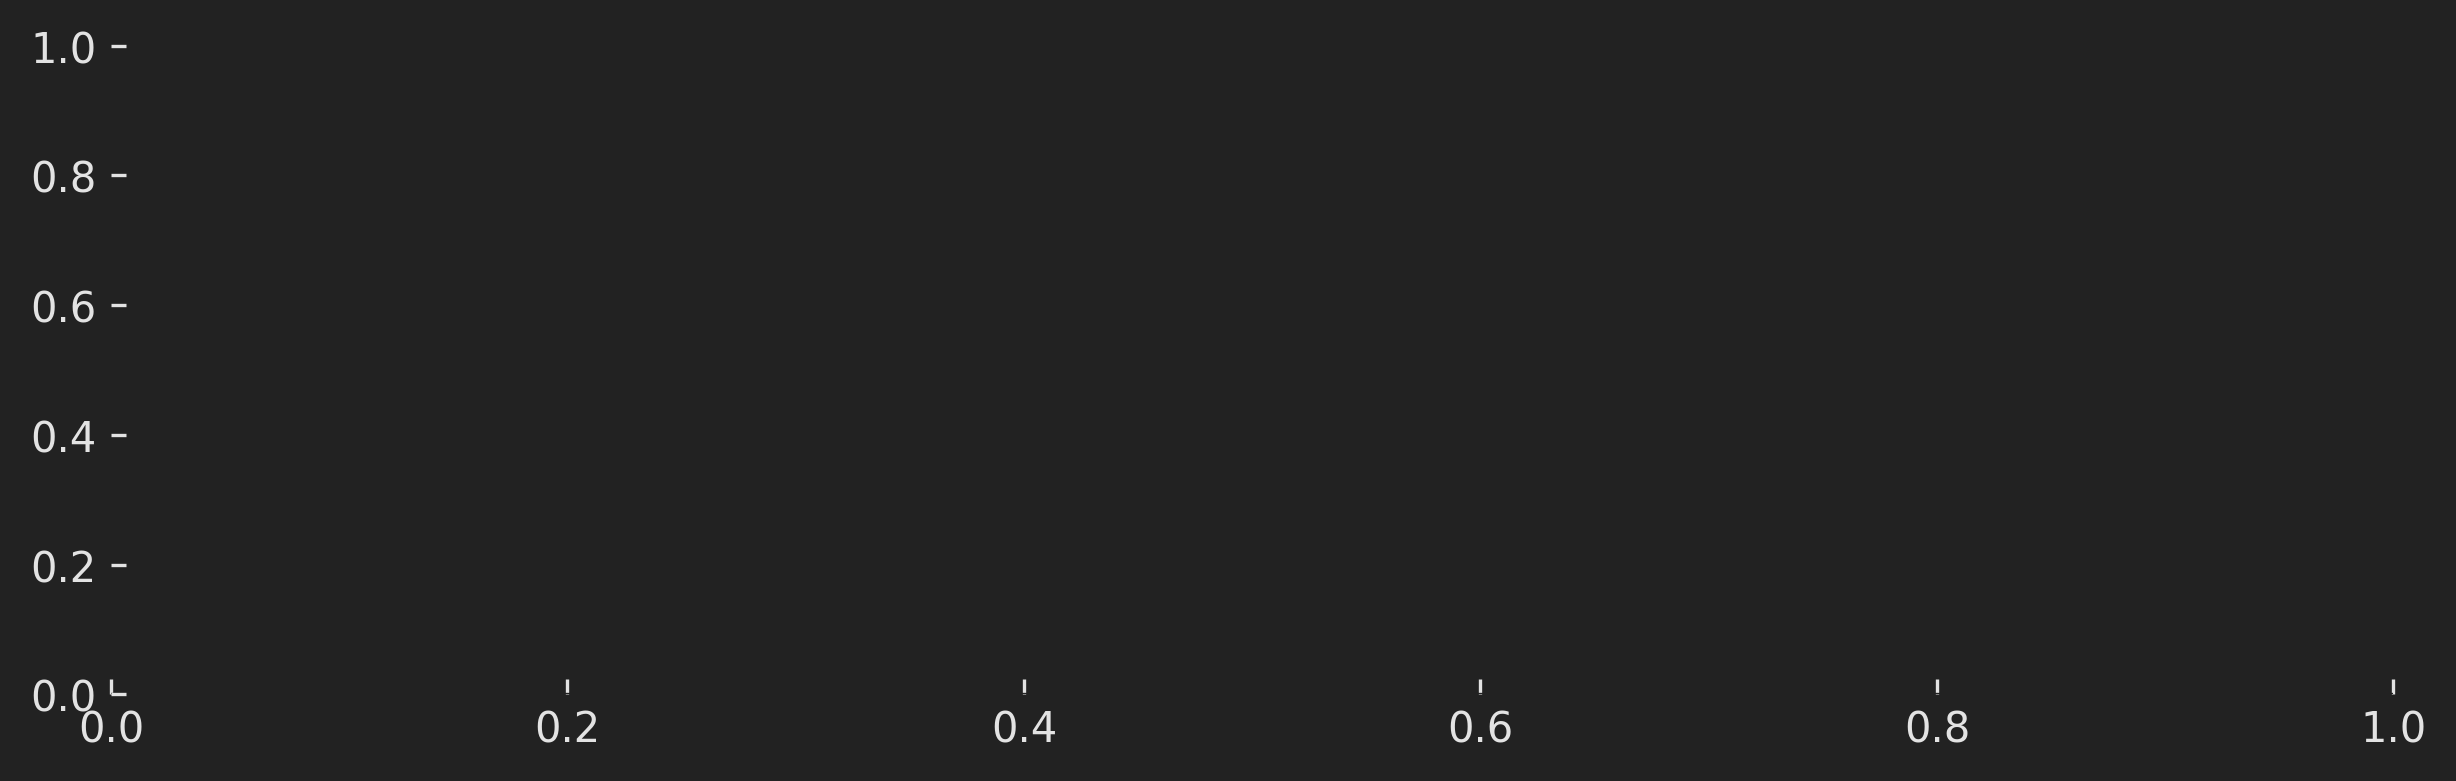

In [35]:
#Reemplazamos todas las instancias de '#000000' por c_texto !!!

cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)

#fig.suptitle('Infografía', fontsize=16, color = 'c_texto')

gs = fig.add_gridspec(nrows=10, ncols=10)

ax = fig.add_subplot(gs[0:2, 2:])

sub_df = df[df['city'] == 'hobart']
sub_df = sub_df.reset_index(drop=True)

sns.barplot(x=sub_df['Date'],y=sub_df["max_tmp_day"], alpha = 0,ax=ax)
ax.get_yaxis().set_visible(False)

ax.tick_params(axis="x", direction="out", which='major', width=2, length=15)

ax.xaxis.set_major_locator(FixedLocator(month_idxs)) 
ax.set_xticklabels([""] * len(month_idxs))
ax.set_xlabel("")

for i, mon in enumerate(calendar.month_abbr[1:13]):
    ax.text(month_idxs[i] + 8, -3, mon, color=c_texto, fontweight='bold')

axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.03], frameon=True)

xLegend = np.linspace(0, 179, 1800)
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800)
axInlet.grid(False)
axInlet.get_yaxis().set_visible(False)

colors = color_p(yLegend / max(yLegend))
axInlet.bar(xLegend, yLegend**0, label='_1', color=colors, align="center")

axInlet.tick_params(axis="x", direction="out", pad=5)
axInlet.xaxis.set_major_locator(MultipleLocator(40))
axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5})

color_p = sns.color_palette("RdYlBu_r",as_cmap=True)  



for i, city in enumerate(cityList):
    sub_df = df[df['city'] == city]
    sub_df = sub_df.reset_index(drop=True)
    colors = color_p(sub_df['max_tmp_day'].astype(int)/ max(df['max_tmp_day'].astype(int)))

    
    ax = fig.add_subplot(gs[i+2, 2:10], ylim=(0, 50))
    sns.barplot(x='Date',y="max_tmp_day",data=sub_df ,palette=colors,ax=ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    highDate = sub_df.loc[sub_df['max_tmp_day'] == max(sub_df.max_tmp_day)].Date
    highTemp = sub_df.max_tmp_day.max()

    ax.annotate("Temp. Max:{} C\n{}".format(highTemp, highDate.values[0]),
        xy=(highDate.index[0], highTemp), xycoords='data',
        xytext=(highDate.index[0]+10, highTemp+5), textcoords='data',
        size=5,
        color=c_texto,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color=c_texto)
       )



    lowDate = sub_df.loc[sub_df['max_tmp_day'] == min(sub_df.max_tmp_day)].Date
    lowTemp = sub_df.max_tmp_day.min()
    ax.annotate("Temp. Min{} C\n{}".format(min(sub_df.max_tmp_day), lowDate.values[0]),
                xy=(lowDate.index[0], lowTemp), xycoords='data',
                xytext=(lowDate.index[0] - 50, lowTemp+10), textcoords='data',
                size=5,
                color=c_texto,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                                color=c_texto)
               )

for i, city in enumerate(cityList):
    axRain = fig.add_subplot(gs[i+2, 0:2], ylim=(-30, 30))
    axRain.annotate('{}'.format(city.capitalize()), (0.5, 0.5),color=c_texto,
                    xycoords='axes fraction', va='center', ha='center')
    axRain.get_xaxis().set_visible(False)
    axRain.get_yaxis().set_visible(False)

plt.savefig("infografia_2.png") # Salvamos la infografia en un archivo PNG
plt.show()

# Fin dinamica Infografia